## A gentle introduction to the DataFrames.jl package

[Bogumił Kamiński](http://bogumilkaminski.pl/about/)

This is a hands-on tutorial and does not intend to cover the details of the internals.

Also we do not try to achieve maximum performance, but show how one can simply do typical tasks.

### The packages used in the tutorial

installed packages

In [1]:
using DataFrames        # core package
using CSV               # working with CSV files
using FreqTables        # frequency tables
using Tables            # interfaces with other tabular types
using Plots, StatsPlots # plotting
using GLM               # regression models

in-built modules

In [2]:
using Statistics, Serialization

Let us make sure we use the same versions of the packages.

In [3]:
using Pkg

In [4]:
versions = [(name=pkg, version=Pkg.installed()[pkg])
            for pkg in ["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"]]

7-element Array{NamedTuple{(:name, :version),Tuple{String,VersionNumber}},1}:
 (name = "DataFrames", version = v"0.19.0")
 (name = "CSV", version = v"0.5.9")        
 (name = "FreqTables", version = v"0.3.1") 
 (name = "Tables", version = v"0.2.9")     
 (name = "Plots", version = v"0.25.3")     
 (name = "StatsPlots", version = v"0.11.0")
 (name = "GLM", version = v"1.3.0")        

It is time for a first encounter with a `DataFrame`

In [5]:
versions_df = DataFrame(versions)

7×2 DataFrame
│ Row │ name       │ version   │
│     │ String     │ VersionN… │
├─────┼────────────┼───────────┤
│ 1   │ DataFrames │ v"0.19.0" │
│ 2   │ CSV        │ v"0.5.9"  │
│ 3   │ FreqTables │ v"0.3.1"  │
│ 4   │ Tables     │ v"0.2.9"  │
│ 5   │ Plots      │ v"0.25.3" │
│ 6   │ StatsPlots │ v"0.11.0" │
│ 7   │ GLM        │ v"1.3.0"  │

Let us play with it a bit - just to get a feeling. First grab one column from it

In [6]:
versions_df.name, versions_df[!, :name], versions_df[!, 1]

(["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"], ["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"], ["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"])

or copy it as a freshly allocated vector.

In [7]:
versions_df[:, :name], versions_df[:, 1]

(["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"], ["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"])

Now grab one row. This ia a view into a data frame.

In [8]:
versions_df[1, :]

DataFrameRow
│ Row │ name       │ version   │
│     │ String     │ VersionN… │
├─────┼────────────┼───────────┤
│ 1   │ DataFrames │ v"0.19.0" │

Some people like to work with `NamedTuple`s

In [9]:
copy(versions_df[1, :])

(name = "DataFrames", version = v"0.19.0")

We can go back to the original `versions` variable like this

In [10]:
copy.(eachrow(versions_df))

7-element Array{NamedTuple{(:name, :version),Tuple{String,VersionNumber}},1}:
 (name = "DataFrames", version = v"0.19.0")
 (name = "CSV", version = v"0.5.9")        
 (name = "FreqTables", version = v"0.3.1") 
 (name = "Tables", version = v"0.2.9")     
 (name = "Plots", version = v"0.25.3")     
 (name = "StatsPlots", version = v"0.11.0")
 (name = "GLM", version = v"1.3.0")        

or like this

In [11]:
Tables.rowtable(versions_df)

7-element Array{NamedTuple{(:name, :version),Tuple{String,VersionNumber}},1}:
 (name = "DataFrames", version = v"0.19.0")
 (name = "CSV", version = v"0.5.9")        
 (name = "FreqTables", version = v"0.3.1") 
 (name = "Tables", version = v"0.2.9")     
 (name = "Plots", version = v"0.25.3")     
 (name = "StatsPlots", version = v"0.11.0")
 (name = "GLM", version = v"1.3.0")        

We can also fetch data columnwise into a `NamedTuple`:

In [12]:
Tables.columntable(versions_df)

(name = ["DataFrames", "CSV", "FreqTables", "Tables", "Plots", "StatsPlots", "GLM"], version = VersionNumber[v"0.19.0", v"0.5.9", v"0.3.1", v"0.2.9", v"0.25.3", v"0.11.0", v"1.3.0"])

Now we want to get a single entry. We do it in several ways again (just to get comfortable).

In [13]:
versions_df[1, 2], versions_df.version[1], versions_df[1, :version]

(v"0.19.0", v"0.19.0", v"0.19.0")

You can also convert your data frame into a `Matrix` (this is most useful when you have numeric data only)

In [14]:
mat = Matrix(versions_df)

7×2 Array{Any,2}:
 "DataFrames"  v"0.19.0"
 "CSV"         v"0.5.9" 
 "FreqTables"  v"0.3.1" 
 "Tables"      v"0.2.9" 
 "Plots"       v"0.25.3"
 "StatsPlots"  v"0.11.0"
 "GLM"         v"1.3.0" 

The conversion back to a data frame from a matrix is also possible:

In [15]:
DataFrame(mat)

7×2 DataFrame
│ Row │ x1         │ x2        │
│     │ Any        │ Any       │
├─────┼────────────┼───────────┤
│ 1   │ DataFrames │ v"0.19.0" │
│ 2   │ CSV        │ v"0.5.9"  │
│ 3   │ FreqTables │ v"0.3.1"  │
│ 4   │ Tables     │ v"0.2.9"  │
│ 5   │ Plots      │ v"0.25.3" │
│ 6   │ StatsPlots │ v"0.11.0" │
│ 7   │ GLM        │ v"1.3.0"  │

Unfortunately it looses column names and column types information.

First let us fix the column names

In [16]:
temp_df = DataFrame(mat, [:name, :version])

7×2 DataFrame
│ Row │ name       │ version   │
│     │ Any        │ Any       │
├─────┼────────────┼───────────┤
│ 1   │ DataFrames │ v"0.19.0" │
│ 2   │ CSV        │ v"0.5.9"  │
│ 3   │ FreqTables │ v"0.3.1"  │
│ 4   │ Tables     │ v"0.2.9"  │
│ 5   │ Plots      │ v"0.25.3" │
│ 6   │ StatsPlots │ v"0.11.0" │
│ 7   │ GLM        │ v"1.3.0"  │

we can create a new `DataFrame` with correct element types:

In [17]:
DataFrame([[x for x in col] for col in eachcol(temp_df)], names(temp_df))

7×2 DataFrame
│ Row │ name       │ version   │
│     │ String     │ VersionN… │
├─────┼────────────┼───────────┤
│ 1   │ DataFrames │ v"0.19.0" │
│ 2   │ CSV        │ v"0.5.9"  │
│ 3   │ FreqTables │ v"0.3.1"  │
│ 4   │ Tables     │ v"0.2.9"  │
│ 5   │ Plots      │ v"0.25.3" │
│ 6   │ StatsPlots │ v"0.11.0" │
│ 7   │ GLM        │ v"1.3.0"  │

or we can fix column types in place (and practice Julia a bit more)

In [18]:
foreach(axes(temp_df, 2)) do colidx
    temp_df[!, colidx] = [x for x in temp_df[!, colidx]]
end

In [19]:
temp_df

7×2 DataFrame
│ Row │ name       │ version   │
│     │ String     │ VersionN… │
├─────┼────────────┼───────────┤
│ 1   │ DataFrames │ v"0.19.0" │
│ 2   │ CSV        │ v"0.5.9"  │
│ 3   │ FreqTables │ v"0.3.1"  │
│ 4   │ Tables     │ v"0.2.9"  │
│ 5   │ Plots      │ v"0.25.3" │
│ 6   │ StatsPlots │ v"0.11.0" │
│ 7   │ GLM        │ v"1.3.0"  │

### Reading in a basic CSV file

Most likely you will want to read in the data from some external source, and typically (like it or not) it will be a CSV file.

We will work with data described and provided [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing). I have included the source file in the repository of the tutorial to simplify things.

In [20]:
bank = DataFrame(CSV.File("bank-additional-full.csv"))

41188×21 DataFrame
│ Row   │ age   │ job         │ marital │ education           │ default │ housing │ loan   │ contact   │ month  │ day_of_week │ duration │ campaign │ pdays │ previous │ poutcome    │ emp.var.rate │ cons.price.idx │ cons.conf.idx │ euribor3m │ nr.employed │ y      │
│       │ Int64 │ String      │ String  │ String              │ String  │ String  │ String │ String    │ String │ String      │ Int64    │ Int64    │ Int64 │ Int64    │ String      │ Float64      │ Float64        │ Float64       │ Float64   │ Float64     │ String │
├───────┼───────┼─────────────┼─────────┼─────────────────────┼─────────┼─────────┼────────┼───────────┼────────┼─────────────┼──────────┼──────────┼───────┼──────────┼─────────────┼──────────────┼────────────────┼───────────────┼───────────┼─────────────┼────────┤
│ 1     │ 56    │ housemaid   │ married │ basic.4y            │ no      │ no      │ no     │ telephone │ may    │ mon         │ 261      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
│ 2     │ 57    │ services    │ married │ high.school         │ unknown │ no      │ no     │ telephone │ may    │ mon         │ 149      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
│ 3     │ 37    │ services    │ married │ high.school         │ no      │ yes     │ no     │ telephone │ may    │ mon         │ 226      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
│ 4     │ 40    │ admin.      │ married │ basic.6y            │ no      │ no      │ no     │ telephone │ may    │ mon         │ 151      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
│ 5     │ 56    │ services    │ married │ high.school         │ no      │ no      │ yes    │ telephone │ may    │ mon         │ 307      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
│ 6     │ 45    │ services    │ married │ basic.9y            │ unknown │ no      │ no     │ telephone │ may    │ mon         │ 198      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
│ 7     │ 59    │ admin.      │ married │ professional.course │ no      │ no      │ no     │ telephone │ may    │ mon         │ 139      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │
⋮
│ 41181 │ 36    │ admin.      │ married │ university.degree   │ no      │ no      │ no     │ cellular  │ nov    │ fri         │ 254      │ 2        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ no     │
│ 41182 │ 37    │ admin.      │ married │ university.degree   │ no      │ yes     │ no     │ cellular  │ nov    │ fri         │ 281      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ yes    │
│ 41183 │ 29    │ unemployed  │ single  │ basic.4y            │ no      │ yes     │ no     │ cellular  │ nov    │ fri         │ 112      │ 1        │ 9     │ 1        │ success     │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ no     │
│ 41184 │ 73    │ retired     │ married │ professional.course │ no      │ yes     │ no     │ cellular  │ nov    │ fri         │ 334      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ yes    │
│ 41185 │ 46    │ blue-collar │ married │ professional.course │ no      │ no      │ no     │ cellular  │ nov    │ fri         │ 383      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      

If you see a different number of rows/columns printed do not panic. You can adjust it following the instructions [here](https://juliadata.github.io/DataFrames.jl/latest/man/getting_started.html#Installation-1).

Some useful facts are that when displaying a data frame you get an information about its size on top and element types contained in its columns just under column names.

It is equally easy to save the data frame back to a CSV file.

In [21]:
CSV.write("newfile.txt", bank)

"newfile.txt"

Let us make sure that all is saved correctly.

In [22]:
DataFrame(CSV.File("newfile.txt")) == bank

true

The beauty of the CSV.jl package is that it does autodetection of delimiters. Actually the original file used `;` while our newly created file used `,` (we could change this but `,` stantds for C in CSV so this is the default). Below we inspect both files visually.

In [23]:
readlines("bank-additional-full.csv")[1:3]

3-element Array{String,1}:
 "\"age\";\"job\";\"marital\";\"education\";\"default\";\"housing\";\"loan\";\"contact\";\"month\";\"day_of_week\";\"duration\";\"campaign\";\"pdays\";\"previous\";\"poutcome\";\"emp.var.rate\";\"cons.price.idx\";\"cons.conf.idx\";\"euribor3m\";\"nr.employed\";\"y\""
 "56;\"housemaid\";\"married\";\"basic.4y\";\"no\";\"no\";\"no\";\"telephone\";\"may\";\"mon\";261;1;999;0;\"nonexistent\";1.1;93.994;-36.4;4.857;5191;\"no\""                                                                                                             
 "57;\"services\";\"married\";\"high.school\";\"unknown\";\"no\";\"no\";\"telephone\";\"may\";\"mon\";149;1;999;0;\"nonexistent\";1.1;93.994;-36.4;4.857;5191;\"no\""                                                                                                      

Let us get rid of these `\"` quotes as they add much visual noise

In [24]:
replace.(readlines("bank-additional-full.csv")[1:3], Ref("\""=>""))

3-element Array{String,1}:
 "age;job;marital;education;default;housing;loan;contact;month;day_of_week;duration;campaign;pdays;previous;poutcome;emp.var.rate;cons.price.idx;cons.conf.idx;euribor3m;nr.employed;y"
 "56;housemaid;married;basic.4y;no;no;no;telephone;may;mon;261;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no"                                                                     
 "57;services;married;high.school;unknown;no;no;telephone;may;mon;149;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no"                                                              

In [25]:
readlines("newfile.txt")[1:3]

3-element Array{String,1}:
 "age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y"
 "56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no"                                                                     
 "57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no"                                                              

We will not need `newfile.txt` so let us remove it.

In [26]:
rm("newfile.txt")

### Your first steps with `DataFrame`

Jou can get a list of names in a data frame using the `names` function.

In [27]:
names(bank)

21-element Array{Symbol,1}:
 :age                    
 :job                    
 :marital                
 :education              
 :default                
 :housing                
 :loan                   
 :contact                
 :month                  
 :day_of_week            
 ⋮                       
 :pdays                  
 :previous               
 :poutcome               
 Symbol("emp.var.rate")  
 Symbol("cons.price.idx")
 Symbol("cons.conf.idx") 
 :euribor3m              
 Symbol("nr.employed")   
 :y                      

The strange looking `Symbol` entries inform you that the column name was non-standard (contained a `.` in this case). You cannot use `.` access to such columns unfortunately, but have to use "bracket" syntax or pass a column number.

In [28]:
bank[!, Symbol("cons.conf.idx")]

41188-element Array{Float64,1}:
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
   ⋮  
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8

You might have noticed that DataFrames.jl uses a non-stantard `!` for row indexing. Here is a quick summary of the rules for getting data from a data frame:
* `df[!, :col]` and `df.col`: get a column `:col` from a data frame as a vector without copying
* `df[:, :col]` get a column `:col` from a data frame as a vector with copying
* `df[!, columns]` and `select(df, columns, copycols=false)`: get a new data frame with `columns` selected without copying the underlying data
* `df[:, columns]` and `select(df, columns)`: get a new data frame with `columns` selected with copying the underlying data

You can also take a subset of columns from a `DataFrame` "in place" using the `select!` function.

Our data frame looks a bit large. Let us subset it.

In [29]:
bank2 = select(bank, [:y, :age, :campaign, :pdays])

41188×4 DataFrame
│ Row   │ y      │ age   │ campaign │ pdays │
│       │ String │ Int64 │ Int64    │ Int64 │
├───────┼────────┼───────┼──────────┼───────┤
│ 1     │ no     │ 56    │ 1        │ 999   │
│ 2     │ no     │ 57    │ 1        │ 999   │
│ 3     │ no     │ 37    │ 1        │ 999   │
│ 4     │ no     │ 40    │ 1        │ 999   │
│ 5     │ no     │ 56    │ 1        │ 999   │
│ 6     │ no     │ 45    │ 1        │ 999   │
│ 7     │ no     │ 59    │ 1        │ 999   │
⋮
│ 41181 │ no     │ 36    │ 2        │ 999   │
│ 41182 │ yes    │ 37    │ 1        │ 999   │
│ 41183 │ no     │ 29    │ 1        │ 9     │
│ 41184 │ yes    │ 73    │ 1        │ 999   │
│ 41185 │ no     │ 46    │ 1        │ 999   │
│ 41186 │ no     │ 56    │ 2        │ 999   │
│ 41187 │ yes    │ 44    │ 1        │ 999   │
│ 41188 │ no     │ 74    │ 3        │ 999   │

You can also use regular expressions as column selector. Here we take all columns that contain `"cons"` string:

In [30]:
select(bank, r"cons")

41188×2 DataFrame
│ Row   │ cons.price.idx │ cons.conf.idx │
│       │ Float64        │ Float64       │
├───────┼────────────────┼───────────────┤
│ 1     │ 93.994         │ -36.4         │
│ 2     │ 93.994         │ -36.4         │
│ 3     │ 93.994         │ -36.4         │
│ 4     │ 93.994         │ -36.4         │
│ 5     │ 93.994         │ -36.4         │
│ 6     │ 93.994         │ -36.4         │
│ 7     │ 93.994         │ -36.4         │
⋮
│ 41181 │ 94.767         │ -50.8         │
│ 41182 │ 94.767         │ -50.8         │
│ 41183 │ 94.767         │ -50.8         │
│ 41184 │ 94.767         │ -50.8         │
│ 41185 │ 94.767         │ -50.8         │
│ 41186 │ 94.767         │ -50.8         │
│ 41187 │ 94.767         │ -50.8         │
│ 41188 │ 94.767         │ -50.8         │

Going back to `bank2` data frame we notice that there is some strange `999` value in the last column. Let us investigate this.

In [31]:
describe(bank2)

4×8 DataFrame
│ Row │ variable │ mean    │ min │ median │ max │ nunique │ nmissing │ eltype   │
│     │ Symbol   │ Union…  │ Any │ Union… │ Any │ Union…  │ Nothing  │ DataType │
├─────┼──────────┼─────────┼─────┼────────┼─────┼─────────┼──────────┼──────────┤
│ 1   │ y        │         │ no  │        │ yes │ 2       │          │ String   │
│ 2   │ age      │ 40.0241 │ 17  │ 38.0   │ 98  │         │          │ Int64    │
│ 3   │ campaign │ 2.56759 │ 1   │ 2.0    │ 56  │         │          │ Int64    │
│ 4   │ pdays    │ 962.475 │ 0   │ 999.0  │ 999 │         │          │ Int64    │

(notice that the result is also a `DataFrame`, so you can work with it programatically in the future if you want)

In [32]:
freqtable(bank2, :pdays)

27-element Named Array{Int64,1}
pdays  │ 
───────┼──────
0      │    15
1      │    26
2      │    61
3      │   439
4      │   118
5      │    46
6      │   412
7      │    60
8      │    18
⋮            ⋮
18     │     7
19     │     3
20     │     1
21     │     2
22     │     3
25     │     1
26     │     1
27     │     1
999    │ 39673

In [33]:
prop(freqtable(bank2, :pdays))

27-element Named Array{Float64,1}
pdays  │ 
───────┼────────────
0      │ 0.000364184
1      │ 0.000631252
2      │  0.00148101
3      │   0.0106584
4      │  0.00286491
5      │  0.00111683
6      │   0.0100029
7      │  0.00145673
8      │  0.00043702
⋮                  ⋮
18     │ 0.000169952
19     │  7.28367e-5
20     │  2.42789e-5
21     │  4.85578e-5
22     │  7.28367e-5
25     │  2.42789e-5
26     │  2.42789e-5
27     │  2.42789e-5
999    │    0.963217

It turns out that `999` means that the client was never contacted by a bank before (see https://archive.ics.uci.edu/ml/datasets/bank+marketing for a description of the data set)

Assume we want to work only with customers who were contacted previously. We can filter `bank2` data frame.

In [34]:
bank3 = filter(row -> row.pdays != 999, bank2)

1515×4 DataFrame
│ Row  │ y      │ age   │ campaign │ pdays │
│      │ String │ Int64 │ Int64    │ Int64 │
├──────┼────────┼───────┼──────────┼───────┤
│ 1    │ no     │ 37    │ 1        │ 6     │
│ 2    │ no     │ 48    │ 1        │ 4     │
│ 3    │ no     │ 42    │ 1        │ 4     │
│ 4    │ no     │ 50    │ 1        │ 3     │
│ 5    │ no     │ 36    │ 2        │ 4     │
│ 6    │ yes    │ 32    │ 2        │ 5     │
│ 7    │ no     │ 31    │ 1        │ 5     │
⋮
│ 1508 │ yes    │ 67    │ 2        │ 5     │
│ 1509 │ yes    │ 35    │ 1        │ 9     │
│ 1510 │ no     │ 60    │ 2        │ 4     │
│ 1511 │ yes    │ 35    │ 3        │ 4     │
│ 1512 │ yes    │ 54    │ 2        │ 10    │
│ 1513 │ yes    │ 62    │ 1        │ 1     │
│ 1514 │ yes    │ 62    │ 2        │ 6     │
│ 1515 │ no     │ 29    │ 1        │ 9     │

Here are some other options that do the same (just as an exercise)

In [35]:
bank2[bank2.pdays .!= 999, :]

1515×4 DataFrame
│ Row  │ y      │ age   │ campaign │ pdays │
│      │ String │ Int64 │ Int64    │ Int64 │
├──────┼────────┼───────┼──────────┼───────┤
│ 1    │ no     │ 37    │ 1        │ 6     │
│ 2    │ no     │ 48    │ 1        │ 4     │
│ 3    │ no     │ 42    │ 1        │ 4     │
│ 4    │ no     │ 50    │ 1        │ 3     │
│ 5    │ no     │ 36    │ 2        │ 4     │
│ 6    │ yes    │ 32    │ 2        │ 5     │
│ 7    │ no     │ 31    │ 1        │ 5     │
⋮
│ 1508 │ yes    │ 67    │ 2        │ 5     │
│ 1509 │ yes    │ 35    │ 1        │ 9     │
│ 1510 │ no     │ 60    │ 2        │ 4     │
│ 1511 │ yes    │ 35    │ 3        │ 4     │
│ 1512 │ yes    │ 54    │ 2        │ 10    │
│ 1513 │ yes    │ 62    │ 1        │ 1     │
│ 1514 │ yes    │ 62    │ 2        │ 6     │
│ 1515 │ no     │ 29    │ 1        │ 9     │

In [36]:
bank2[Not(bank2.pdays .== 999), :]

1515×4 DataFrame
│ Row  │ y      │ age   │ campaign │ pdays │
│      │ String │ Int64 │ Int64    │ Int64 │
├──────┼────────┼───────┼──────────┼───────┤
│ 1    │ no     │ 37    │ 1        │ 6     │
│ 2    │ no     │ 48    │ 1        │ 4     │
│ 3    │ no     │ 42    │ 1        │ 4     │
│ 4    │ no     │ 50    │ 1        │ 3     │
│ 5    │ no     │ 36    │ 2        │ 4     │
│ 6    │ yes    │ 32    │ 2        │ 5     │
│ 7    │ no     │ 31    │ 1        │ 5     │
⋮
│ 1508 │ yes    │ 67    │ 2        │ 5     │
│ 1509 │ yes    │ 35    │ 1        │ 9     │
│ 1510 │ no     │ 60    │ 2        │ 4     │
│ 1511 │ yes    │ 35    │ 3        │ 4     │
│ 1512 │ yes    │ 54    │ 2        │ 10    │
│ 1513 │ yes    │ 62    │ 1        │ 1     │
│ 1514 │ yes    │ 62    │ 2        │ 6     │
│ 1515 │ no     │ 29    │ 1        │ 9     │

In the last example note that DataFrames.jl supports `Not` from InvertedIndices.jl (both for rows and for columns selection).

One might ask if the data is correlated in `bank3` data frame. It is easy to check.

Recode variable `y` to be binary. Let us first make sure that it is binary indeed.

In [37]:
by(bank3, :y, count = :y=>length)

2×2 DataFrame
│ Row │ y      │ count │
│     │ String │ Int64 │
├─────┼────────┼───────┤
│ 1   │ no     │ 548   │
│ 2   │ yes    │ 967   │

OK - it is safe to recode it.

In [38]:
bank3.y_bin = recode(bank3.y, "no"=>0, "yes"=>1)

1515-element Array{Int64,1}:
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 ⋮
 1
 1
 1
 0
 1
 1
 1
 1
 0

Always double check if you got what you wanted. We will do it in several ways.

In [39]:
freqtable(bank3, :y, :y_bin)

2×2 Named Array{Int64,2}
y ╲ y_bin │   0    1
──────────┼─────────
no        │ 548    0
yes       │   0  967

In [40]:
by(bank3, [:y, :y_bin], df -> (count=nrow(df),))

2×3 DataFrame
│ Row │ y      │ y_bin │ count │
│     │ String │ Int64 │ Int64 │
├─────┼────────┼───────┼───────┤
│ 1   │ no     │ 0     │ 548   │
│ 2   │ yes    │ 1     │ 967   │

In [41]:
by(bank3, :y, df -> (y_bin_0 = count(==(0), df.y_bin), y_bin_1 = count(==(1), df.y_bin)))

2×3 DataFrame
│ Row │ y      │ y_bin_0 │ y_bin_1 │
│     │ String │ Int64   │ Int64   │
├─────┼────────┼─────────┼─────────┤
│ 1   │ no     │ 548     │ 0       │
│ 2   │ yes    │ 0       │ 967     │

In [42]:
crosstable = by(bank3, :y, df -> DataFrame([[count(==(i), df.y_bin)] for i in 0:1], Symbol.(0:1)))

2×3 DataFrame
│ Row │ y      │ 0     │ 1     │
│     │ String │ Int64 │ Int64 │
├─────┼────────┼───────┼───────┤
│ 1   │ no     │ 548   │ 0     │
│ 2   │ yes    │ 0     │ 967   │

Let us try getting something similar we got in the first approach

In [43]:
crosstable2 = stack(crosstable, 2:3)

4×3 DataFrame
│ Row │ variable │ value │ y      │
│     │ Symbol   │ Int64 │ String │
├─────┼──────────┼───────┼────────┤
│ 1   │ 0        │ 548   │ no     │
│ 2   │ 0        │ 0     │ yes    │
│ 3   │ 1        │ 0     │ no     │
│ 4   │ 1        │ 967   │ yes    │

What if we do not like the ordering and naming of variables in this table?

In [44]:
rename!(crosstable2, :variable=>:y_bin, :value=>:count)

4×3 DataFrame
│ Row │ y_bin  │ count │ y      │
│     │ Symbol │ Int64 │ String │
├─────┼────────┼───────┼────────┤
│ 1   │ 0      │ 548   │ no     │
│ 2   │ 0      │ 0     │ yes    │
│ 3   │ 1      │ 0     │ no     │
│ 4   │ 1      │ 967   │ yes    │

we could have done this in one shot

In [45]:
stack(crosstable, 2:3, variable_name=:y_bin, value_name=:count)

4×3 DataFrame
│ Row │ y_bin  │ count │ y      │
│     │ Symbol │ Int64 │ String │
├─────┼────────┼───────┼────────┤
│ 1   │ 0      │ 548   │ no     │
│ 2   │ 0      │ 0     │ yes    │
│ 3   │ 1      │ 0     │ no     │
│ 4   │ 1      │ 967   │ yes    │

We still have a mixed up several things in the data frame. Let us fix it in place.

In [46]:
permutecols!(crosstable2, [3,1,2])

4×3 DataFrame
│ Row │ y      │ y_bin  │ count │
│     │ String │ Symbol │ Int64 │
├─────┼────────┼────────┼───────┤
│ 1   │ no     │ 0      │ 548   │
│ 2   │ yes    │ 0      │ 0     │
│ 3   │ no     │ 1      │ 0     │
│ 4   │ yes    │ 1      │ 967   │

In [47]:
sort!(crosstable2)

4×3 DataFrame
│ Row │ y      │ y_bin  │ count │
│     │ String │ Symbol │ Int64 │
├─────┼────────┼────────┼───────┤
│ 1   │ no     │ 0      │ 548   │
│ 2   │ no     │ 1      │ 0     │
│ 3   │ yes    │ 0      │ 0     │
│ 4   │ yes    │ 1      │ 967   │

In [48]:
crosstable2.y_bin = parse.(Int, string.(crosstable2.y_bin))

4-element Array{Int64,1}:
 0
 1
 0
 1

In [49]:
filter(row -> row.count != 0,crosstable2)

2×3 DataFrame
│ Row │ y      │ y_bin │ count │
│     │ String │ Int64 │ Int64 │
├─────┼────────┼───────┼───────┤
│ 1   │ no     │ 0     │ 548   │
│ 2   │ yes    │ 1     │ 967   │

back to the correlation analysis ...

In [50]:
cor(Matrix(bank3[!,Not(1)]))

4×4 Array{Float64,2}:
  1.0          0.00495337  -0.069608    0.0702834
  0.00495337   1.0          0.0457519  -0.125418 
 -0.069608     0.0457519    1.0        -0.0352235
  0.0702834   -0.125418    -0.0352235   1.0      

In [51]:
cor2 = DataFrame([(var1=names(bank3)[i],
                   var2=names(bank3)[j],
                   cor=cor(bank3[!, i], bank3[!, j])) for i in 2:ncol(bank3) for j in 2:ncol(bank3)])

16×3 DataFrame
│ Row │ var1     │ var2     │ cor        │
│     │ Symbol   │ Symbol   │ Float64    │
├─────┼──────────┼──────────┼────────────┤
│ 1   │ age      │ age      │ 1.0        │
│ 2   │ age      │ campaign │ 0.00495337 │
│ 3   │ age      │ pdays    │ -0.069608  │
│ 4   │ age      │ y_bin    │ 0.0702834  │
│ 5   │ campaign │ age      │ 0.00495337 │
│ 6   │ campaign │ campaign │ 1.0        │
│ 7   │ campaign │ pdays    │ 0.0457519  │
│ 8   │ campaign │ y_bin    │ -0.125418  │
│ 9   │ pdays    │ age      │ -0.069608  │
│ 10  │ pdays    │ campaign │ 0.0457519  │
│ 11  │ pdays    │ pdays    │ 1.0        │
│ 12  │ pdays    │ y_bin    │ -0.0352235 │
│ 13  │ y_bin    │ age      │ 0.0702834  │
│ 14  │ y_bin    │ campaign │ -0.125418  │
│ 15  │ y_bin    │ pdays    │ -0.0352235 │
│ 16  │ y_bin    │ y_bin    │ 1.0        │

In [52]:
unstack(cor2, :var2, :cor)

4×5 DataFrame
│ Row │ var1     │ age        │ campaign   │ pdays      │ y_bin      │
│     │ Symbol   │ Float64⍰   │ Float64⍰   │ Float64⍰   │ Float64⍰   │
├─────┼──────────┼────────────┼────────────┼────────────┼────────────┤
│ 1   │ age      │ 1.0        │ 0.00495337 │ -0.069608  │ 0.0702834  │
│ 2   │ campaign │ 0.00495337 │ 1.0        │ 0.0457519  │ -0.125418  │
│ 3   │ pdays    │ -0.069608  │ 0.0457519  │ 1.0        │ -0.0352235 │
│ 4   │ y_bin    │ 0.0702834  │ -0.125418  │ -0.0352235 │ 1.0        │

### Using `DataFrame` for dynamic collection of data

Let us play a game. We draw a random numbers from U(0,1) until their sum exceeds `1`. We want to store the results of such experiment in a `DataFrame`.

In [53]:
function run_experiment()
    draws = Float64[]
    while true
        push!(draws, rand())
        sum(draws) > 1 && return (draws=draws, count=length(draws))
    end
end

run_experiment (generic function with 1 method)

In [54]:
run_experiment()

(draws = [0.812413, 0.849193], count = 2)

In [55]:
df = DataFrame()

0×0 DataFrame

In [56]:
push!(df, run_experiment())

1×2 DataFrame
│ Row │ draws               │ count │
│     │ Array{Float64,1}    │ Int64 │
├─────┼─────────────────────┼───────┤
│ 1   │ [0.74403, 0.732463] │ 2     │

In [57]:
foreach(_ -> push!(df, run_experiment()), 1:99999)

In [58]:
df

100000×2 DataFrame
│ Row    │ draws                                      │ count │
│        │ Array{Float64,1}                           │ Int64 │
├────────┼────────────────────────────────────────────┼───────┤
│ 1      │ [0.74403, 0.732463]                        │ 2     │
│ 2      │ [0.838132, 0.171815]                       │ 2     │
│ 3      │ [0.93936, 0.669683]                        │ 2     │
│ 4      │ [0.256597, 0.791124]                       │ 2     │
│ 5      │ [0.614238, 0.215261, 0.0261319, 0.563844]  │ 4     │
│ 6      │ [0.0767591, 0.631947, 0.0541721, 0.894192] │ 4     │
│ 7      │ [0.88506, 0.105888, 0.792631]              │ 3     │
⋮
│ 99993  │ [0.665591, 0.71168]                        │ 2     │
│ 99994  │ [0.0697854, 0.362342, 0.684456]            │ 3     │
│ 99995  │ [0.123318, 0.370206, 0.628749]             │ 3     │
│ 99996  │ [0.451094, 0.801961]                       │ 2     │
│ 99997  │ [0.608422, 0.56905]                        │ 2     │
│ 99998  │ [0.591695, 0.545144]                       │ 2     │
│ 99999  │ [0.381242, 0.214035, 0.880119]             │ 3     │
│ 100000 │ [0.556394, 0.766422]                       │ 2     │

In [59]:
mean(df[!, 2])

2.72151

In [60]:
mean(row.draws[1] for row in eachrow(df))

0.4991095640442882

In [61]:
mean(v[end] for v in df[!, 1])

0.6413013216850261

If you alter wanted to work with this data in some other packages it might be useful to convert a `DataFrame` into a `NamedTuple` of vectors as we have already seen.

In [62]:
Tables.columntable(df)

(draws = Array{Float64,1}[[0.74403, 0.732463], [0.838132, 0.171815], [0.93936, 0.669683], [0.256597, 0.791124], [0.614238, 0.215261, 0.0261319, 0.563844], [0.0767591, 0.631947, 0.0541721, 0.894192], [0.88506, 0.105888, 0.792631], [0.412502, 0.0746864, 0.201145, 0.142898, 0.125737, 0.888675], [0.619809, 0.270317, 0.179226], [0.108472, 0.351069, 0.872278]  …  [0.599917, 0.786889], [0.293654, 0.568363, 0.938619], [0.665591, 0.71168], [0.0697854, 0.362342, 0.684456], [0.123318, 0.370206, 0.628749], [0.451094, 0.801961], [0.608422, 0.56905], [0.591695, 0.545144], [0.381242, 0.214035, 0.880119], [0.556394, 0.766422]], count = [2, 2, 2, 2, 4, 4, 3, 6, 3, 3  …  2, 3, 2, 3, 3, 2, 2, 2, 3, 2])

or a vector of `NamedTuple`s

In [63]:
Tables.rowtable(df)

100000-element Array{NamedTuple{(:draws, :count),Tuple{Array{Float64,1},Int64}},1}:
 (draws = [0.74403, 0.732463], count = 2)                                          
 (draws = [0.838132, 0.171815], count = 2)                                         
 (draws = [0.93936, 0.669683], count = 2)                                          
 (draws = [0.256597, 0.791124], count = 2)                                         
 (draws = [0.614238, 0.215261, 0.0261319, 0.563844], count = 4)                    
 (draws = [0.0767591, 0.631947, 0.0541721, 0.894192], count = 4)                   
 (draws = [0.88506, 0.105888, 0.792631], count = 3)                                
 (draws = [0.412502, 0.0746864, 0.201145, 0.142898, 0.125737, 0.888675], count = 6)
 (draws = [0.619809, 0.270317, 0.179226], count = 3)                               
 (draws = [0.108472, 0.351069, 0.872278], count = 3)                               
 ⋮                                                                          

Also if you have a non-standard data types stored in your data frame CSV is not flexible enough to safely store it on disk.

In such case the simplest option is to use serialization. This is a fast approach. Its only drawback is that it assumes that the data will be read on the same configuration of the machine, Julia and the packages as it were written (this is a low level binary representation of your data).

In [64]:
serialize("df.bin", df)

In [65]:
df2 = deserialize("df.bin")

100000×2 DataFrame
│ Row    │ draws                                      │ count │
│        │ Array{Float64,1}                           │ Int64 │
├────────┼────────────────────────────────────────────┼───────┤
│ 1      │ [0.74403, 0.732463]                        │ 2     │
│ 2      │ [0.838132, 0.171815]                       │ 2     │
│ 3      │ [0.93936, 0.669683]                        │ 2     │
│ 4      │ [0.256597, 0.791124]                       │ 2     │
│ 5      │ [0.614238, 0.215261, 0.0261319, 0.563844]  │ 4     │
│ 6      │ [0.0767591, 0.631947, 0.0541721, 0.894192] │ 4     │
│ 7      │ [0.88506, 0.105888, 0.792631]              │ 3     │
⋮
│ 99993  │ [0.665591, 0.71168]                        │ 2     │
│ 99994  │ [0.0697854, 0.362342, 0.684456]            │ 3     │
│ 99995  │ [0.123318, 0.370206, 0.628749]             │ 3     │
│ 99996  │ [0.451094, 0.801961]                       │ 2     │
│ 99997  │ [0.608422, 0.56905]                        │ 2     │
│ 99998  │ [0.591695, 0.545144]                       │ 2     │
│ 99999  │ [0.381242, 0.214035, 0.880119]             │ 3     │
│ 100000 │ [0.556394, 0.766422]                       │ 2     │

In [66]:
df2 == df

true

In [67]:
rm("df.bin")

## Handling missing data

Let us go back to our `bank2` data frame.

In [68]:
bank2

41188×4 DataFrame
│ Row   │ y      │ age   │ campaign │ pdays │
│       │ String │ Int64 │ Int64    │ Int64 │
├───────┼────────┼───────┼──────────┼───────┤
│ 1     │ no     │ 56    │ 1        │ 999   │
│ 2     │ no     │ 57    │ 1        │ 999   │
│ 3     │ no     │ 37    │ 1        │ 999   │
│ 4     │ no     │ 40    │ 1        │ 999   │
│ 5     │ no     │ 56    │ 1        │ 999   │
│ 6     │ no     │ 45    │ 1        │ 999   │
│ 7     │ no     │ 59    │ 1        │ 999   │
⋮
│ 41181 │ no     │ 36    │ 2        │ 999   │
│ 41182 │ yes    │ 37    │ 1        │ 999   │
│ 41183 │ no     │ 29    │ 1        │ 9     │
│ 41184 │ yes    │ 73    │ 1        │ 999   │
│ 41185 │ no     │ 46    │ 1        │ 999   │
│ 41186 │ no     │ 56    │ 2        │ 999   │
│ 41187 │ yes    │ 44    │ 1        │ 999   │
│ 41188 │ no     │ 74    │ 3        │ 999   │

We know that if `:pdays` is `999` then it is a missing value. We can perform the conversion in several ways.

In [69]:
bank2.pdays2 = replace(bank2.pdays, 999=>missing)

41188-element Array{Union{Missing, Int64},1}:
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
 ⋮       
  missing
  missing
  missing
 9       
  missing
  missing
  missing
  missing
  missing

In [70]:
freqtable(bank2.pdays .!= 999, bank2.pdays2 .!= missing)

2×1 Named Array{Int64,2}
Dim1 ╲ Dim2 │ missing
────────────┼────────
false       │   39673
true        │    1515

This is surprising. We can to better

In [71]:
freqtable(bank2.pdays .!= 999, isequal.(bank2.pdays2, missing))

2×2 Named Array{Int64,2}
Dim1 ╲ Dim2 │ false   true
────────────┼─────────────
false       │     0  39673
true        │  1515      0

Remember that `missing` usses three valued logic. The `isequal` and `isless` functions do not pass missing, other standard operators return missing if they encounter missing.

In [72]:
1 < missing

missing

In [73]:
isless(1, missing)

true

In [74]:
isless(Inf, missing)

true

by the way, it is good to remember that `missing` is larger than any real value in `isless` comparison.

Let us see another example to see that it matters.

In [75]:
filter(row -> row.pdays2 == 1, bank2)

TypeError: TypeError: non-boolean (Missing) used in boolean context

It is easy to fix it though.

In [76]:
filter(row -> isequal(row.pdays2, 1), bank2)

26×5 DataFrame
│ Row │ y      │ age   │ campaign │ pdays │ pdays2 │
│     │ String │ Int64 │ Int64    │ Int64 │ Int64⍰ │
├─────┼────────┼───────┼──────────┼───────┼────────┤
│ 1   │ no     │ 51    │ 2        │ 1     │ 1      │
│ 2   │ no     │ 50    │ 3        │ 1     │ 1      │
│ 3   │ no     │ 26    │ 1        │ 1     │ 1      │
│ 4   │ no     │ 34    │ 1        │ 1     │ 1      │
│ 5   │ no     │ 37    │ 2        │ 1     │ 1      │
│ 6   │ no     │ 45    │ 1        │ 1     │ 1      │
│ 7   │ no     │ 48    │ 2        │ 1     │ 1      │
⋮
│ 19  │ yes    │ 28    │ 1        │ 1     │ 1      │
│ 20  │ no     │ 37    │ 1        │ 1     │ 1      │
│ 21  │ no     │ 24    │ 1        │ 1     │ 1      │
│ 22  │ yes    │ 22    │ 2        │ 1     │ 1      │
│ 23  │ yes    │ 52    │ 3        │ 1     │ 1      │
│ 24  │ no     │ 34    │ 1        │ 1     │ 1      │
│ 25  │ yes    │ 29    │ 2        │ 1     │ 1      │
│ 26  │ yes    │ 62    │ 1        │ 1     │ 1      │

Sometimes you want to retain `missing` after filtering. This is the way to do it.

In [77]:
bank_tmp = filter(row -> coalesce(row.pdays2 == 1, true), bank2)

39699×5 DataFrame
│ Row   │ y      │ age   │ campaign │ pdays │ pdays2  │
│       │ String │ Int64 │ Int64    │ Int64 │ Int64⍰  │
├───────┼────────┼───────┼──────────┼───────┼─────────┤
│ 1     │ no     │ 56    │ 1        │ 999   │ missing │
│ 2     │ no     │ 57    │ 1        │ 999   │ missing │
│ 3     │ no     │ 37    │ 1        │ 999   │ missing │
│ 4     │ no     │ 40    │ 1        │ 999   │ missing │
│ 5     │ no     │ 56    │ 1        │ 999   │ missing │
│ 6     │ no     │ 45    │ 1        │ 999   │ missing │
│ 7     │ no     │ 59    │ 1        │ 999   │ missing │
⋮
│ 39692 │ no     │ 64    │ 3        │ 999   │ missing │
│ 39693 │ no     │ 36    │ 2        │ 999   │ missing │
│ 39694 │ yes    │ 37    │ 1        │ 999   │ missing │
│ 39695 │ yes    │ 73    │ 1        │ 999   │ missing │
│ 39696 │ no     │ 46    │ 1        │ 999   │ missing │
│ 39697 │ no     │ 56    │ 2        │ 999   │ missing │
│ 39698 │ yes    │ 44    │ 1        │ 999   │ missing │
│ 39699 │ no     │ 74    │ 3        │ 999   │ missing │

But the table is long - how to make sure we have only `1` and `missing` in the `:pdays2` column?

In [78]:
freqtable(bank_tmp, :pdays2)

2-element Named Array{Int64,1}
pdays2  │ 
────────┼──────
1       │    26
missing │ 39673

In [79]:
by(bank_tmp, :pdays2, nrow)

2×2 DataFrame
│ Row │ pdays2  │ x1    │
│     │ Int64⍰  │ Int64 │
├─────┼─────────┼───────┤
│ 1   │ missing │ 39673 │
│ 2   │ 1       │ 26    │

Note that columns allowing missing values have a special `⍰` character printed by their element type information.

Also `describe` is useful in analyzing missing data.

In [80]:
describe(bank2)

5×8 DataFrame
│ Row │ variable │ mean    │ min │ median │ max │ nunique │ nmissing │ eltype   │
│     │ Symbol   │ Union…  │ Any │ Union… │ Any │ Union…  │ Union…   │ DataType │
├─────┼──────────┼─────────┼─────┼────────┼─────┼─────────┼──────────┼──────────┤
│ 1   │ y        │         │ no  │        │ yes │ 2       │          │ String   │
│ 2   │ age      │ 40.0241 │ 17  │ 38.0   │ 98  │         │          │ Int64    │
│ 3   │ campaign │ 2.56759 │ 1   │ 2.0    │ 56  │         │          │ Int64    │
│ 4   │ pdays    │ 962.475 │ 0   │ 999.0  │ 999 │         │          │ Int64    │
│ 5   │ pdays2   │ 6.01452 │ 0   │ 6.0    │ 27  │         │ 39673    │ Int64    │

What if we wanted to change `:pdays` vector to allow missing values?

Initially it does not allow them.

In [81]:
bank2.pdays[1] = missing

MethodError: MethodError: Cannot `convert` an object of type Missing to an object of type Int64
Closest candidates are:
  convert(::Type{T<:Number}, !Matched::T<:Number) where T<:Number at number.jl:6
  convert(::Type{T<:Number}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T<:Integer}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

You have to change the type of the vector using the `allowmissing!` function.

In [82]:
allowmissing!(bank2, :pdays)

41188×5 DataFrame
│ Row   │ y      │ age   │ campaign │ pdays  │ pdays2  │
│       │ String │ Int64 │ Int64    │ Int64⍰ │ Int64⍰  │
├───────┼────────┼───────┼──────────┼────────┼─────────┤
│ 1     │ no     │ 56    │ 1        │ 999    │ missing │
│ 2     │ no     │ 57    │ 1        │ 999    │ missing │
│ 3     │ no     │ 37    │ 1        │ 999    │ missing │
│ 4     │ no     │ 40    │ 1        │ 999    │ missing │
│ 5     │ no     │ 56    │ 1        │ 999    │ missing │
│ 6     │ no     │ 45    │ 1        │ 999    │ missing │
│ 7     │ no     │ 59    │ 1        │ 999    │ missing │
⋮
│ 41181 │ no     │ 36    │ 2        │ 999    │ missing │
│ 41182 │ yes    │ 37    │ 1        │ 999    │ missing │
│ 41183 │ no     │ 29    │ 1        │ 9      │ 9       │
│ 41184 │ yes    │ 73    │ 1        │ 999    │ missing │
│ 41185 │ no     │ 46    │ 1        │ 999    │ missing │
│ 41186 │ no     │ 56    │ 2        │ 999    │ missing │
│ 41187 │ yes    │ 44    │ 1        │ 999    │ missing │
│ 41188 │ no     │ 74    │ 3        │ 999    │ missing │

Now you can assign `missing` to `:pdays` column.

In [83]:
replace!(bank2.pdays, 999 => missing)

41188-element Array{Union{Missing, Int64},1}:
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
 ⋮       
  missing
  missing
  missing
 9       
  missing
  missing
  missing
  missing
  missing

In [84]:
describe(bank2)

5×8 DataFrame
│ Row │ variable │ mean    │ min │ median │ max │ nunique │ nmissing │ eltype   │
│     │ Symbol   │ Union…  │ Any │ Union… │ Any │ Union…  │ Union…   │ DataType │
├─────┼──────────┼─────────┼─────┼────────┼─────┼─────────┼──────────┼──────────┤
│ 1   │ y        │         │ no  │        │ yes │ 2       │          │ String   │
│ 2   │ age      │ 40.0241 │ 17  │ 38.0   │ 98  │         │          │ Int64    │
│ 3   │ campaign │ 2.56759 │ 1   │ 2.0    │ 56  │         │          │ Int64    │
│ 4   │ pdays    │ 6.01452 │ 0   │ 6.0    │ 27  │         │ 39673    │ Int64    │
│ 5   │ pdays2   │ 6.01452 │ 0   │ 6.0    │ 27  │         │ 39673    │ Int64    │

Again - let us check that it worked correctly.

In [85]:
bank2.pdays == bank2.pdays2

missing

We knew it would fail - right?

In [86]:
isequal(bank2.pdays, bank2.pdays2)

true

Often we want to get rid of missing data from a data frame. We can do this using the `dropmissing` function.

In [87]:
bank4 = dropmissing(bank2)

1515×5 DataFrame
│ Row  │ y      │ age   │ campaign │ pdays │ pdays2 │
│      │ String │ Int64 │ Int64    │ Int64 │ Int64  │
├──────┼────────┼───────┼──────────┼───────┼────────┤
│ 1    │ no     │ 37    │ 1        │ 6     │ 6      │
│ 2    │ no     │ 48    │ 1        │ 4     │ 4      │
│ 3    │ no     │ 42    │ 1        │ 4     │ 4      │
│ 4    │ no     │ 50    │ 1        │ 3     │ 3      │
│ 5    │ no     │ 36    │ 2        │ 4     │ 4      │
│ 6    │ yes    │ 32    │ 2        │ 5     │ 5      │
│ 7    │ no     │ 31    │ 1        │ 5     │ 5      │
⋮
│ 1508 │ yes    │ 67    │ 2        │ 5     │ 5      │
│ 1509 │ yes    │ 35    │ 1        │ 9     │ 9      │
│ 1510 │ no     │ 60    │ 2        │ 4     │ 4      │
│ 1511 │ yes    │ 35    │ 3        │ 4     │ 4      │
│ 1512 │ yes    │ 54    │ 2        │ 10    │ 10     │
│ 1513 │ yes    │ 62    │ 1        │ 1     │ 1      │
│ 1514 │ yes    │ 62    │ 2        │ 6     │ 6      │
│ 1515 │ no     │ 29    │ 1        │ 9     │ 9      │

Note that now columns automatically dicallow missing values.

Actually `bank4` should be the same as `bank3` on the first 4 columns. Let us check this.

In [88]:
bank3[!, 1:4] == bank4[!, 1:4]

true

## No tutorial is complete without plotting instructions

Let us first do some exploratory plotting

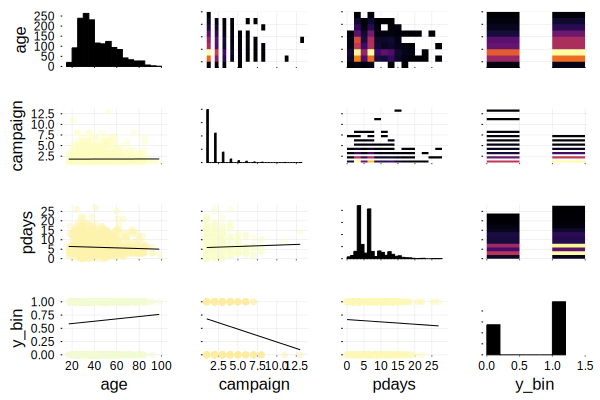

In [89]:
@df bank3 corrplot(cols(2:5))

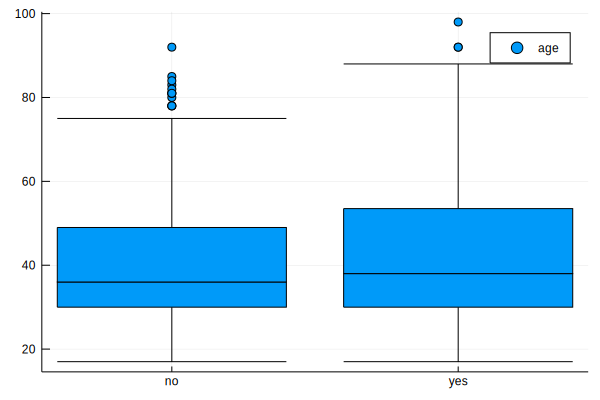

In [90]:
@df bank3 boxplot(:y, :age, label="age")

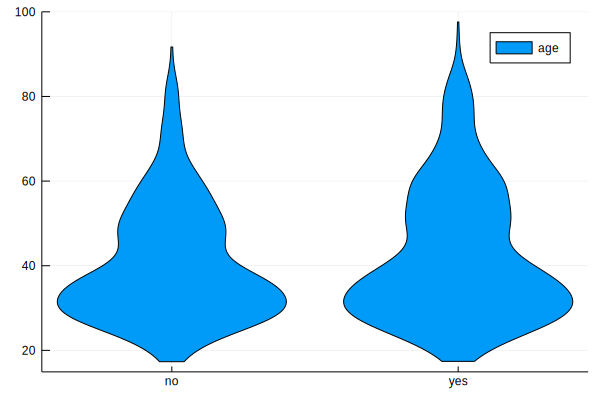

In [91]:
@df bank3 violin(:y, :age, label="age")

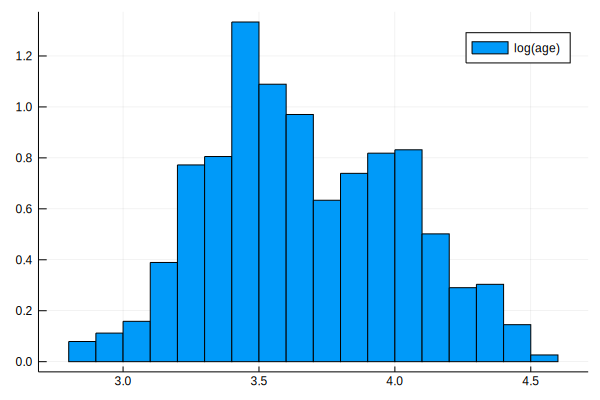

In [92]:
@df bank3 histogram(log.(:age), label="log(age)", normalize=true)

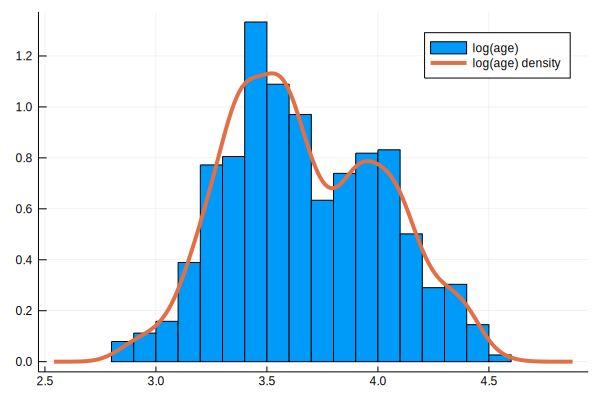

In [93]:
@df bank3 density!(log.(:age), linewidth=4, label="log(age) density")

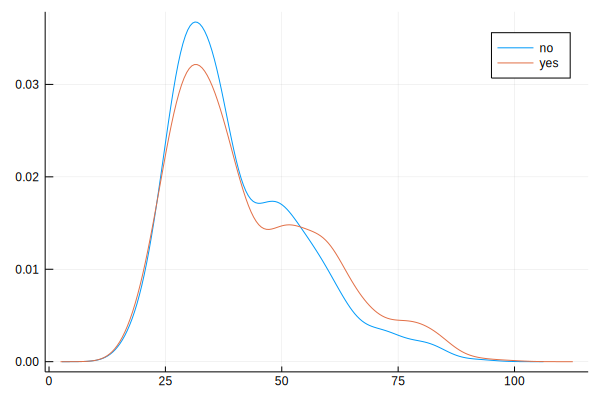

In [94]:
@df bank3 density(:age, group=:y)

## Categorical vairables

Sometimes you want to add to your columns the metadata that they are categorical.

In this section we discuss how you can do it and how this information is used by the `GLM` package as an application example.

Let us get back to our original `bank` data frame. We will want to build a model explaining `:y` using some other variables from the data set.

(warnings will be gone soon after StatsModels.jl package is updated)

In [95]:
glm(@formula(y ~ age + day_of_week + campaign), bank, Binomial())

MethodError: MethodError: no method matching fit(::Type{GeneralizedLinearModel}, ::Array{Float64,2}, ::Array{Float64,2}, ::Binomial{Float64})
Closest candidates are:
  fit(!Matched::Type{StatsBase.Histogram}, ::Any...; kwargs...) at C:\Users\bogum\.julia\packages\StatsBase\rTkaz\src\hist.jl:319
  fit(!Matched::StatisticalModel, ::Any...) at C:\Users\bogum\.julia\packages\StatsBase\rTkaz\src\statmodels.jl:152
  fit(!Matched::Type{D<:Distributions.Distribution}, ::Any...) where D<:Distributions.Distribution at C:\Users\bogum\.julia\packages\Distributions\0Wogo\src\genericfit.jl:34
  ...

This failed, because the `GLM` package needs to know that `:y` is binary. Let us change this.

In [96]:
bank.y_bin = ifelse.(bank.y .== "yes", 1, 0)

41188-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 1
 0
 1
 0
 0
 1
 0

In [97]:
bank

41188×22 DataFrame
│ Row   │ age   │ job         │ marital │ education           │ default │ housing │ loan   │ contact   │ month  │ day_of_week │ duration │ campaign │ pdays │ previous │ poutcome    │ emp.var.rate │ cons.price.idx │ cons.conf.idx │ euribor3m │ nr.employed │ y      │ y_bin │
│       │ Int64 │ String      │ String  │ String              │ String  │ String  │ String │ String    │ String │ String      │ Int64    │ Int64    │ Int64 │ Int64    │ String      │ Float64      │ Float64        │ Float64       │ Float64   │ Float64     │ String │ Int64 │
├───────┼───────┼─────────────┼─────────┼─────────────────────┼─────────┼─────────┼────────┼───────────┼────────┼─────────────┼──────────┼──────────┼───────┼──────────┼─────────────┼──────────────┼────────────────┼───────────────┼───────────┼─────────────┼────────┼───────┤
│ 1     │ 56    │ housemaid   │ married │ basic.4y            │ no      │ no      │ no     │ telephone │ may    │ mon         │ 261      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 2     │ 57    │ services    │ married │ high.school         │ unknown │ no      │ no     │ telephone │ may    │ mon         │ 149      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 3     │ 37    │ services    │ married │ high.school         │ no      │ yes     │ no     │ telephone │ may    │ mon         │ 226      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 4     │ 40    │ admin.      │ married │ basic.6y            │ no      │ no      │ no     │ telephone │ may    │ mon         │ 151      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 5     │ 56    │ services    │ married │ high.school         │ no      │ no      │ yes    │ telephone │ may    │ mon         │ 307      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 6     │ 45    │ services    │ married │ basic.9y            │ unknown │ no      │ no     │ telephone │ may    │ mon         │ 198      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 7     │ 59    │ admin.      │ married │ professional.course │ no      │ no      │ no     │ telephone │ may    │ mon         │ 139      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
⋮
│ 41181 │ 36    │ admin.      │ married │ university.degree   │ no      │ no      │ no     │ cellular  │ nov    │ fri         │ 254      │ 2        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ no     │ 0     │
│ 41182 │ 37    │ admin.      │ married │ university.degree   │ no      │ yes     │ no     │ cellular  │ nov    │ fri         │ 281      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ yes    │ 1     │
│ 41183 │ 29    │ unemployed  │ single  │ basic.4y            │ no      │ yes     │ no     │ cellular  │ nov    │ fri         │ 112      │ 1        │ 9     │ 1        │ success     │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ no     │ 0     │
│ 41184 │ 73    │ retired     │ married │ professional.course │ no      │ yes     │ no     │ cellular  │ nov    │ fri         │ 334      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ yes    │ 1     │
│ 41185 │ 46    │ blue-collar │ married │ professional.course │ no      │ no      │ no     │ cellular  │ nov    │ fri         │ 383      │ 1   

In [98]:
glm(@formula(y_bin ~ age + day_of_week + campaign), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y_bin ~ 1 + age + day_of_week + campaign

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                     Estimate  Std. Error    z value  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -2.18369     0.0727297   -30.0247     <1e-99  -2.32624     -2.04114   
age                0.00916394  0.0014537     6.30389    <1e-9    0.00631475   0.0120131 
day_of_week: mon  -0.0986672   0.0514918    -1.91617    0.0553  -0.199589     0.00225484
day_of_week: thu   0.115643    0.0493282     2.34435    0.0191   0.018961     0.212324  
day_of_week: tue   0.0670772   0.0503273     1.33282    0.1826  -0.0315626    0.165717  
day_of_week: wed   0.0

This is not very nice as `day_of_week` is not properly ordered. Fortunately it is easy to change this.

In [99]:
categorical!(bank, :day_of_week)

41188×22 DataFrame
│ Row   │ age   │ job         │ marital │ education           │ default │ housing │ loan   │ contact   │ month  │ day_of_week  │ duration │ campaign │ pdays │ previous │ poutcome    │ emp.var.rate │ cons.price.idx │ cons.conf.idx │ euribor3m │ nr.employed │ y      │ y_bin │
│       │ Int64 │ String      │ String  │ String              │ String  │ String  │ String │ String    │ String │ Categorical… │ Int64    │ Int64    │ Int64 │ Int64    │ String      │ Float64      │ Float64        │ Float64       │ Float64   │ Float64     │ String │ Int64 │
├───────┼───────┼─────────────┼─────────┼─────────────────────┼─────────┼─────────┼────────┼───────────┼────────┼──────────────┼──────────┼──────────┼───────┼──────────┼─────────────┼──────────────┼────────────────┼───────────────┼───────────┼─────────────┼────────┼───────┤
│ 1     │ 56    │ housemaid   │ married │ basic.4y            │ no      │ no      │ no     │ telephone │ may    │ mon          │ 261      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 2     │ 57    │ services    │ married │ high.school         │ unknown │ no      │ no     │ telephone │ may    │ mon          │ 149      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 3     │ 37    │ services    │ married │ high.school         │ no      │ yes     │ no     │ telephone │ may    │ mon          │ 226      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 4     │ 40    │ admin.      │ married │ basic.6y            │ no      │ no      │ no     │ telephone │ may    │ mon          │ 151      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 5     │ 56    │ services    │ married │ high.school         │ no      │ no      │ yes    │ telephone │ may    │ mon          │ 307      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 6     │ 45    │ services    │ married │ basic.9y            │ unknown │ no      │ no     │ telephone │ may    │ mon          │ 198      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
│ 7     │ 59    │ admin.      │ married │ professional.course │ no      │ no      │ no     │ telephone │ may    │ mon          │ 139      │ 1        │ 999   │ 0        │ nonexistent │ 1.1          │ 93.994         │ -36.4         │ 4.857     │ 5191.0      │ no     │ 0     │
⋮
│ 41181 │ 36    │ admin.      │ married │ university.degree   │ no      │ no      │ no     │ cellular  │ nov    │ fri          │ 254      │ 2        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ no     │ 0     │
│ 41182 │ 37    │ admin.      │ married │ university.degree   │ no      │ yes     │ no     │ cellular  │ nov    │ fri          │ 281      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ yes    │ 1     │
│ 41183 │ 29    │ unemployed  │ single  │ basic.4y            │ no      │ yes     │ no     │ cellular  │ nov    │ fri          │ 112      │ 1        │ 9     │ 1        │ success     │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ no     │ 0     │
│ 41184 │ 73    │ retired     │ married │ professional.course │ no      │ yes     │ no     │ cellular  │ nov    │ fri          │ 334      │ 1        │ 999   │ 0        │ nonexistent │ -1.1         │ 94.767         │ -50.8         │ 1.028     │ 4963.6      │ yes    │ 1     │
│ 41185 │ 46    │ blue-collar │ married │ professional.course │ no      │ no      │ no     │ cellular  │ nov    │ fri          │ 

In [100]:
levels(bank.day_of_week)

5-element Array{String,1}:
 "fri"
 "mon"
 "thu"
 "tue"
 "wed"

In [101]:
levels!(bank.day_of_week, ["mon", "tue", "wed", "thu", "fri"]);

Now the order of levels should be correct.

In [102]:
glm(@formula(y_bin ~ age + day_of_week + campaign), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y_bin ~ 1 + age + day_of_week + campaign

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                     Estimate  Std. Error    z value  Pr(>|z|)    Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -2.28236     0.0728343   -31.3363     <1e-99  -2.42511     -2.1396   
age                0.00916394  0.0014537     6.30389    <1e-9    0.00631475   0.0120131
day_of_week: tue   0.165744    0.0501678     3.3038     0.0010   0.0674174    0.264071 
day_of_week: wed   0.165913    0.0502154     3.30402    0.0010   0.0674924    0.264333 
day_of_week: thu   0.21431     0.0491724     4.35834    <1e-4    0.117934     0.310686 
day_of_week: fri   0.0986672  

Let us have a more detailed look at `:campaign` variable.

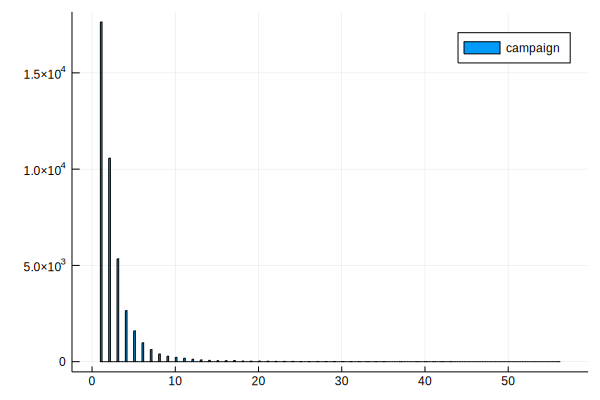

In [103]:
@df bank histogram(:campaign, label="campaign")

It is very skewed. We will cut it into several bins.

In [104]:
bank.campaign_cat = cut(bank.campaign, [1,2,3,4], extend=true)

41188-element CategoricalArray{String,1,UInt32}:
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 ⋮       
 "[3, 4)"
 "[2, 3)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[1, 2)"
 "[2, 3)"
 "[1, 2)"
 "[3, 4)"

In [105]:
levels(bank.campaign_cat)

4-element Array{String,1}:
 "[1, 2)" 
 "[2, 3)" 
 "[3, 4)" 
 "[4, 56]"

In [106]:
prop(freqtable(bank.campaign_cat))

4-element Named Array{Float64,1}
Dim1    │ 
────────┼─────────
[1, 2)  │ 0.428329
[2, 3)  │ 0.256628
[3, 4)  │ 0.129674
[4, 56] │  0.18537

In [107]:
glm(@formula(y_bin ~ age + day_of_week + campaign_cat), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y_bin ~ 1 + age + day_of_week + campaign_cat

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────
                          Estimate  Std. Error    z value  Pr(>|z|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)            -2.39969     0.0723434   -33.1708     <1e-99  -2.54148     -2.2579   
age                     0.00912225  0.00145425    6.27282    <1e-9    0.00627197   0.0119725
day_of_week: tue        0.16417     0.0502005     3.27028    0.0011   0.0657788    0.262561 
day_of_week: wed        0.162328    0.050238      3.23118    0.0012   0.0638635    0.260793 
day_of_week: thu        0.204475    0.0492072     4.15538    <1e-4    0.10803  

Now let us investigate the `:age` variable.

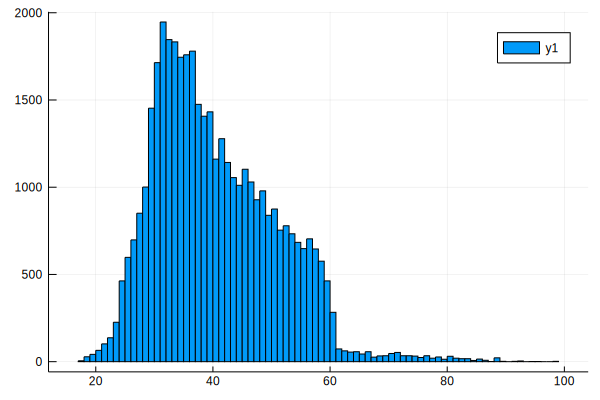

In [108]:
histogram(bank.age)

In [109]:
bank.age_cut = cut(bank.age, 10)

41188-element CategoricalArray{String,1,UInt32}:
 "[55.0, 98.0]"
 "[55.0, 98.0]"
 "[35.0, 38.0)"
 "[38.0, 41.0)"
 "[55.0, 98.0]"
 "[45.0, 49.0)"
 "[55.0, 98.0]"
 "[41.0, 45.0)"
 "[17.0, 28.0)"
 "[17.0, 28.0)"
 ⋮             
 "[55.0, 98.0]"
 "[35.0, 38.0)"
 "[35.0, 38.0)"
 "[28.0, 31.0)"
 "[55.0, 98.0]"
 "[45.0, 49.0)"
 "[55.0, 98.0]"
 "[41.0, 45.0)"
 "[55.0, 98.0]"

In [110]:
y_by_age = by(bank, :age_cut, mean_y_bin = :y_bin => mean)

10×2 DataFrame
│ Row │ age_cut      │ mean_y_bin │
│     │ Categorical… │ Float64    │
├─────┼──────────────┼────────────┤
│ 1   │ [17.0, 28.0) │ 0.18196    │
│ 2   │ [28.0, 31.0) │ 0.129319   │
│ 3   │ [31.0, 33.0) │ 0.106512   │
│ 4   │ [33.0, 35.0) │ 0.110117   │
│ 5   │ [35.0, 38.0) │ 0.0913442  │
│ 6   │ [38.0, 41.0) │ 0.08525    │
│ 7   │ [41.0, 45.0) │ 0.0822559  │
│ 8   │ [45.0, 49.0) │ 0.0806931  │
│ 9   │ [49.0, 55.0) │ 0.0915523  │
│ 10  │ [55.0, 98.0] │ 0.188416   │

In [111]:
y_by_age.age_cut = string.(y_by_age.age_cut) # this step will not be needed soon

10-element Array{String,1}:
 "[17.0, 28.0)"
 "[28.0, 31.0)"
 "[31.0, 33.0)"
 "[33.0, 35.0)"
 "[35.0, 38.0)"
 "[38.0, 41.0)"
 "[41.0, 45.0)"
 "[45.0, 49.0)"
 "[49.0, 55.0)"
 "[55.0, 98.0]"

In [112]:
using Plots.Measures # we need this to specify larger bottom margin in points

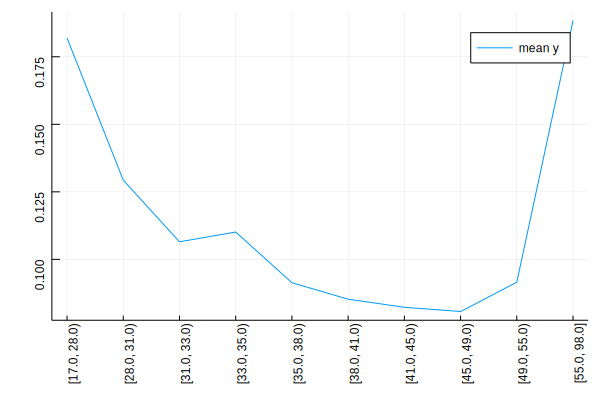

In [113]:
@df y_by_age plot(:age_cut, :mean_y_bin, label="mean y", rotation=90, bottom_margin=40pt)

It looks like our relationship is not linear. Let us add a quadratic term to the model.

In [114]:
bank.age2 = bank.age .^ 2

41188-element Array{Int64,1}:
 3136
 3249
 1369
 1600
 3136
 2025
 3481
 1681
  576
  625
    ⋮
 4096
 1296
 1369
  841
 5329
 2116
 3136
 1936
 5476

In [115]:
model = glm(@formula(y_bin ~ age + age2 + day_of_week + campaign_cat), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y_bin ~ 1 + age + age2 + day_of_week + campaign_cat

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                          Estimate  Std. Error    z value  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)             1.90667     0.168144     11.3395     <1e-29   1.57712      2.23623   
age                    -0.194612    0.00752238  -25.8711     <1e-99  -0.209356    -0.179869  
age2                    0.00222718  8.16362e-5   27.2818     <1e-99   0.00206718   0.00238719
day_of_week: tue        0.146174    0.0510021     2.86603    0.0042   0.0462113    0.246136  
day_of_week: wed        0.132466    0.0510235     2.59618    0.00

or simply

In [116]:
glm(@formula(y_bin ~ age + age^2 + day_of_week + campaign_cat), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y_bin ~ 1 + age + :(age ^ 2) + day_of_week + campaign_cat

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                          Estimate  Std. Error    z value  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)             1.90667     0.168144     11.3395     <1e-29   1.57712      2.23623   
age                    -0.194612    0.00752238  -25.8711     <1e-99  -0.209356    -0.179869  
age ^ 2                 0.00222718  8.16362e-5   27.2818     <1e-99   0.00206718   0.00238719
day_of_week: tue        0.146174    0.0510021     2.86603    0.0042   0.0462113    0.246136  
day_of_week: wed        0.132466    0.0510235     2.59618  

In [117]:
est = coef(model)

10-element Array{Float64,1}:
  1.906672429722076   
 -0.1946124345586892  
  0.002227182537277201
  0.14617362521031638 
  0.13246609237293802 
  0.18347444563043305 
  0.08949646535853194 
 -0.13087911994619217 
 -0.17296494557712713 
 -0.6097773077596924  

In [118]:
-est[2]/(2*est[3])

43.69027488797772

And we now see that the minimum probability is at age of around 44 years.